In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm #the package helps showing advanced statistics about regression

In this project, I will use Linear Regression along with other Machine Learning to show the significance of attributes in the dataset to the main target.

In [2]:
dataset = pd.DataFrame (pd.read_csv (r'C:\Users\admin\Desktop\archive\Fish.csv'))

In [3]:
dataset.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
15,Bream,600.0,29.4,32.0,37.2,15.4380,5.5800
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736
115,Perch,690.0,34.6,37.0,39.3,10.5717,6.3666
101,Perch,218.0,25.0,26.5,28.0,7.1680,4.1440
139,Pike,770.0,44.8,48.0,51.2,7.6800,5.3760
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
48,Roach,169.0,22.0,24.0,27.2,7.5344,3.8352
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680


In [4]:
dataset = dataset.drop(['Species'], axis = 1)

In [5]:
dataset.shape

(159, 6)

In [6]:
dataset.head(10)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
5,450.0,26.8,29.7,34.7,13.6024,4.9274
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35.0,12.6700,4.6900
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,28.5,30.7,36.2,14.2266,4.9594


In [7]:
print ('Basic statistics of the dataset')
print (dataset.describe())

Basic statistics of the dataset
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


## Define variables and target

In [9]:
data = dataset.values

In [10]:
X = data[:, 1: 6]
Y = data[:, 0]

In [11]:
X1 = data[:,1].reshape (-1,1)
X2 = data[:,2].reshape (-1,1)
X3 = data[:,3].reshape (-1,1)
X4 = data[:,4].reshape (-1,1)
X5 = data[:,5].reshape (-1,1)

## Finding validation score to decide whether I should use Linear Regression for prediction

In [12]:
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.2)

In [13]:
model = LinearRegression ()

In [14]:
model.fit (x_train, y_train)
a = model.score (x_test, y_test)
print ('The accuracy score of Linear Reression model is: ', a)

The accuracy score of Linear Reression model is:  0.9341218371773494


The accuracy score is quite high, then there is a strong evidence to support using Linear Regression for the data.

## Univariate Analysis

In [15]:
def get_univariate (XX):
    sns.set(style = 'ticks')
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.10, .90)})

    sns.boxplot(XX, ax=ax_box)
    sns.distplot(XX, ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


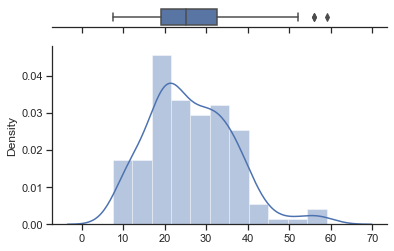

In [16]:
get_univariate (X1)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


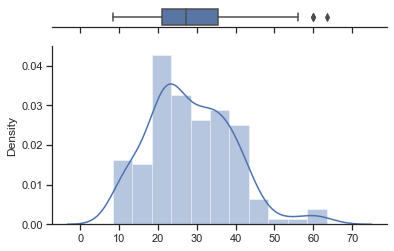

In [17]:
get_univariate  (X2)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


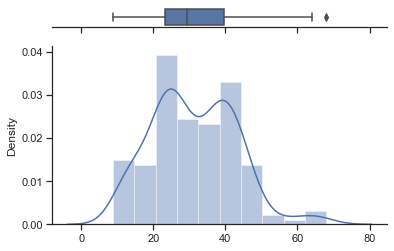

In [18]:
get_univariate (X3)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


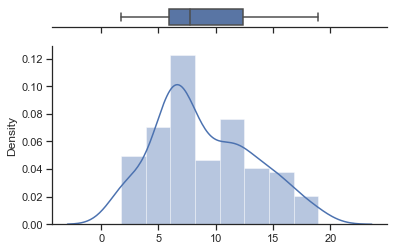

In [19]:
get_univariate (X4)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


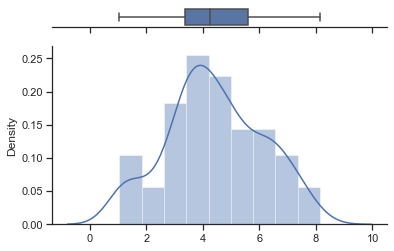

In [20]:
get_univariate (X5)

{'whiskers': [<matplotlib.lines.Line2D at 0x20552e35e50>,
 'caps': [<matplotlib.lines.Line2D at 0x20552e444f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20552e35af0>,
 'medians': [<matplotlib.lines.Line2D at 0x20552e44bb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x20552e44f10>,
 'means': []}

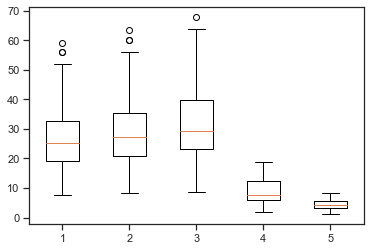

In [21]:
plt.boxplot (X)

## Bivariate Anaysis

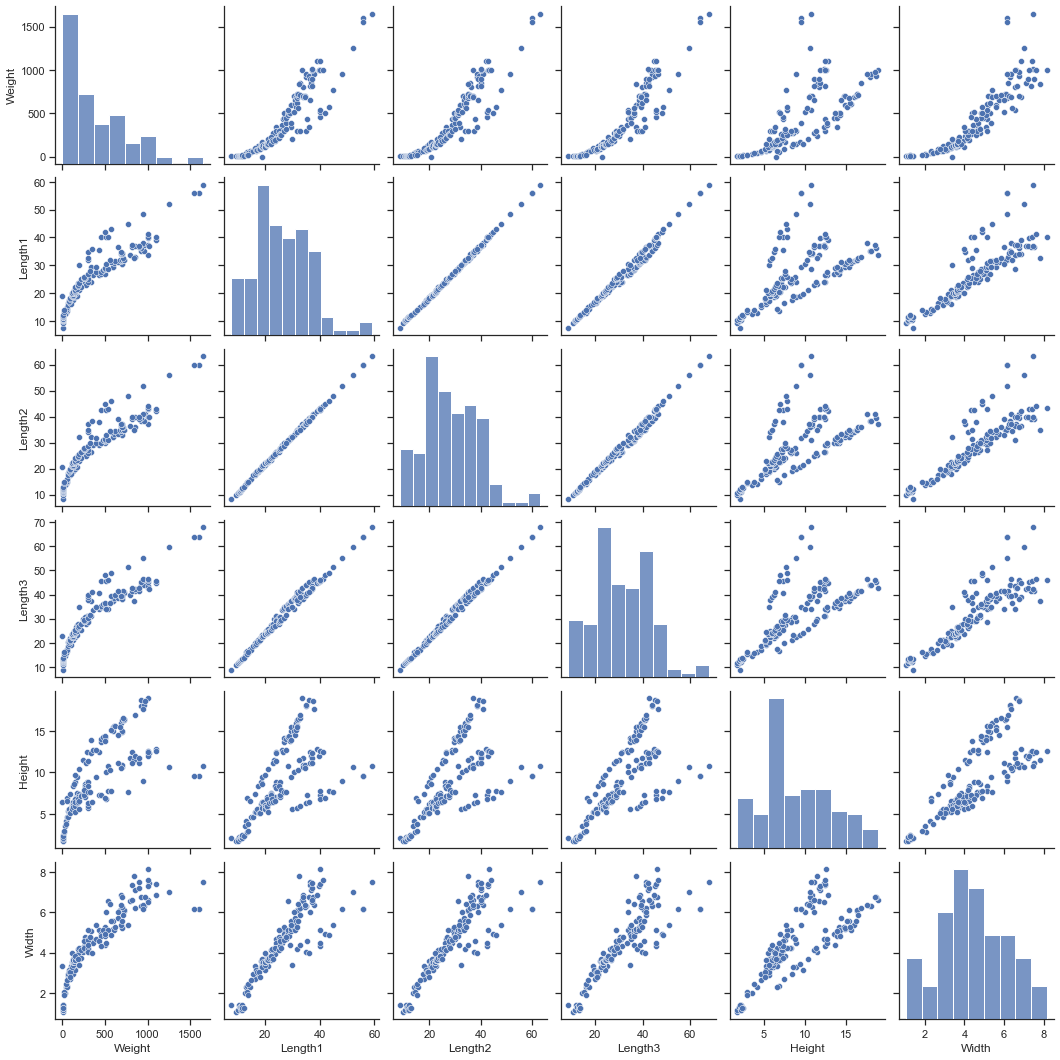

In [22]:
sns.pairplot (dataset)

In [23]:
def get_score_and_plot (XX, x_name, y_name):
    model = LinearRegression()
    model.fit (XX, Y)
    print (model.score (XX,Y))
    plt.scatter (XX, Y)
    plt.xlabel (x_name)
    plt.ylabel (y_name)
    plt.plot (XX, model.predict (XX), color = 'green')
    plt.legend (['Regression Line', 'Actual Value'], loc = 'lower right')
    print ('{} + x*{}'.format (model.intercept_, model.coef_))
    print (np.corrcoef(XX.reshape (1,-1), Y.reshape (1,-1))[0,1])
    print (sm.OLS (Y, sm.add_constant (XX)).fit().summary())
    mean = np.ones((159,1))
    mean[:, 0] = Y.mean()
    print ('SSReg = ', np.sum ((model.predict (XX) - mean)**2))
    print ('MSReg = ', (np.sum ((model.predict (XX) - mean)**2))/1)
    print ('SSRes = ', np.sum ((model.predict (XX) - Y)**2))
    print ('MSRes = ', (np.sum ((model.predict (XX) - Y)**2))/157)
    print ('SSTotal = ',np.sum ((Y - mean)**2))
    print ('se = ', np.sqrt((np.sum ((model.predict (XX) - Y)**2))/157))
    

0.8385279468768119
-462.37507915831395 + x*[32.7921639]
0.915711716031204
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     815.3
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           4.75e-64
Time:                        02:03:06   Log-Likelihood:                -1015.1
No. Observations:                 159   AIC:                             2034.
Df Residuals:                     157   BIC:                             2040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

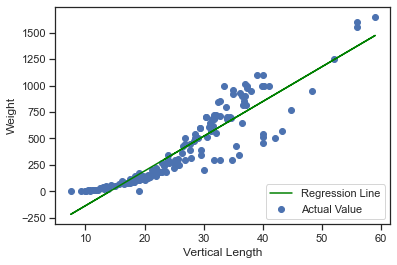

In [24]:
get_score_and_plot (X1, 'Vertical Length', 'Weight')

0.8438584812596858
-473.64900740680093 + x*[30.68637086]
0.9186177013642217
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     848.5
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           3.40e-65
Time:                        02:03:08   Log-Likelihood:                -1012.5
No. Observations:                 159   AIC:                             2029.
Df Residuals:                     157   BIC:                             2035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

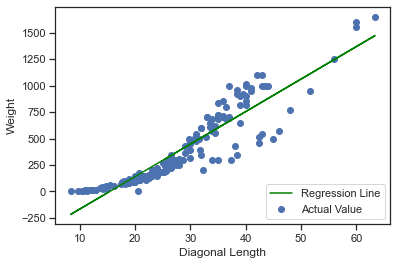

In [25]:
get_score_and_plot (X2, 'Diagonal Length', 'Weight')

0.8520094124796921
-490.40059158917984 + x*[28.4601708]
0.9230435593620121
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     903.9
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           5.02e-67
Time:                        02:03:09   Log-Likelihood:                -1008.2
No. Observations:                 159   AIC:                             2020.
Df Residuals:                     157   BIC:                             2027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

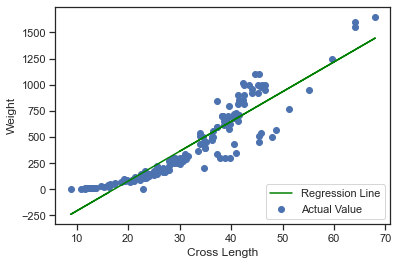

In [26]:
get_score_and_plot (X3, 'Cross Length', 'Weight')

0.5246761559328882
-144.3859711547874 + x*[60.49635121]
0.7243453291993319
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     173.3
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           3.84e-27
Time:                        02:03:09   Log-Likelihood:                -1101.0
No. Observations:                 159   AIC:                             2206.
Df Residuals:                     157   BIC:                             2212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

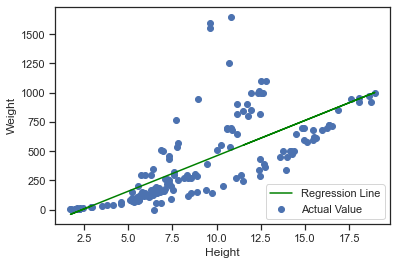

In [27]:
get_score_and_plot (X4, 'Height', 'Weight')

0.7858939611400793
-433.2588525217859 + x*[188.24855477]
0.8865066052433445
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     576.3
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           2.04e-54
Time:                        02:03:10   Log-Likelihood:                -1037.6
No. Observations:                 159   AIC:                             2079.
Df Residuals:                     157   BIC:                             2085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

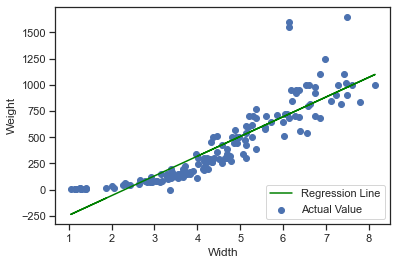

In [28]:
get_score_and_plot (X5, 'Width', 'Weight')

## Multivariate Analysis

In [29]:
model = LinearRegression()
model.fit (X, Y)
print (model.score (X, Y))
print (sm.OLS(Y, sm.add_constant (X)).fit().summary())
mean = np.ones((159,1))
mean[:, 0] = Y.mean()
print ('SSReg = ', np.sum ((model.predict (X) - mean)**2))
print ('MSReg = ', (np.sum ((model.predict (X) - mean)**2))/5)
print ('SSRes = ', np.sum ((model.predict (X) - Y)**2))
print ('MSRes = ', (np.sum ((model.predict (X) - Y)**2))/153)
print ('SSTotal = ',np.sum ((Y - mean)**2))
print ('se = ', np.sqrt((np.sum ((model.predict (X) - Y)**2))/157))

0.8852867046546207
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           4.95e-70
Time:                        02:03:14   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.5870     29.572 

In [ ]:
sm.add_constant (X) #adding a column with 1 from the left of the matrix, if not, the algorithm will take the intial first column as constant.